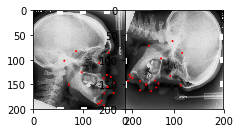

In [67]:
import os
import imgaug
from skimage import io, transform
from skimage import img_as_ubyte
from imgaug import augmenters as iaa
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, transform
# images = np.random.randint(0, 255, (16, 128, 128, 3), dtype=np.uint8)
SAMPLE_PATH = "ceph_test_data/001.bmp"
TXT_PATH = "ceph_test_data/001.txt"
# import sample image
img = img_as_ubyte(io.imread(SAMPLE_PATH, as_grey=True))
x,y = img.shape
SCALE = 15
img_dimmed = np.expand_dims(img, axis=0)


def extract_labels_from_txt(path):
    with open(path, "r") as f:
        # only first 19 are actual coords in dataset label files
        coords_raw = f.readlines()[:18]
        coords_raw = [tuple([int(float(s)) for s in t.split(",")]) for t in coords_raw]
        return coords_raw

coords_raw = extract_labels_from_txt(TXT_PATH)

kp_to_list = lambda k_arr: [(p.x, p.y) for p in k_arr]

def list_to_kp(coords_raw):
    kp = []
    for coord in coords_raw:
        kp.append(imgaug.Keypoint(x=coord[0], y=coord[1]))
    keypoints = imgaug.KeypointsOnImage(kp, shape=img.shape)
    return keypoints
    
keypoints_on_images = [list_to_kp(coords_raw)]


rs = iaa.Sequential([iaa.Scale({"height":200, "width":200})])
rs_det = rs.to_deterministic()
# seq = iaa.Sequential([iaa.Fliplr(1.0)])
# seq = iaa.Sequential([iaa.Flipud(1.0)])
seq = iaa.Sequential([iaa.Affine(rotate=90)])
seq_det = seq.to_deterministic() # call this for each batch again, NOT only once at the start

images_rs = rs_det.augment_images(img_dimmed)
keypoints_rs = rs_det.augment_keypoints(keypoints_on_images)
images_aug = seq_det.augment_images(images_rs)
keypoints_aug = seq_det.augment_keypoints(keypoints_rs)

fig = plt.figure()

# plt.rcParams["figure.figsize"] = [16,9]
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 1, 1)
ax1.imshow(images_rs[0], cmap="gray")
ax2.imshow(images_aug[0], cmap="gray")

k_orig = kp_to_list(keypoints_rs[0].keypoints)
k_aug = kp_to_list(keypoints_aug[0].keypoints)

for c in k_orig:
    ax1.add_patch(plt.Circle(c, 1, color='r')) 

for c in k_aug:
    ax2.add_patch(plt.Circle(c, 1, color='r')) 
    
plt.show()

/Users/franzr/Desktop/main_code/DENT_NEW/data/data_profile/profile/wang_cephalometrics/RawImage/Test1Data/151.bmp
/Users/franzr/Desktop/main_code/DENT_NEW/data/data_profile/profile/wang_cephalometrics/RawImage/Test1Data/152.bmp
/Users/franzr/Desktop/main_code/DENT_NEW/data/data_profile/profile/wang_cephalometrics/RawImage/Test1Data/153.bmp
/Users/franzr/Desktop/main_code/DENT_NEW/data/data_profile/profile/wang_cephalometrics/RawImage/Test1Data/154.bmp
/Users/franzr/Desktop/main_code/DENT_NEW/data/data_profile/profile/wang_cephalometrics/RawImage/Test1Data/155.bmp
/Users/franzr/Desktop/main_code/DENT_NEW/data/data_profile/profile/wang_cephalometrics/RawImage/Test1Data/156.bmp
/Users/franzr/Desktop/main_code/DENT_NEW/data/data_profile/profile/wang_cephalometrics/RawImage/Test1Data/157.bmp
/Users/franzr/Desktop/main_code/DENT_NEW/data/data_profile/profile/wang_cephalometrics/RawImage/Test1Data/158.bmp
/Users/franzr/Desktop/main_code/DENT_NEW/data/data_profile/profile/wang_cephalometrics/R

/Users/franzr/Desktop/main_code/DENT_NEW/data/data_profile/profile/wang_cephalometrics/RawImage/Test1Data/223.bmp
/Users/franzr/Desktop/main_code/DENT_NEW/data/data_profile/profile/wang_cephalometrics/RawImage/Test1Data/224.bmp
/Users/franzr/Desktop/main_code/DENT_NEW/data/data_profile/profile/wang_cephalometrics/RawImage/Test1Data/225.bmp
/Users/franzr/Desktop/main_code/DENT_NEW/data/data_profile/profile/wang_cephalometrics/RawImage/Test1Data/226.bmp
/Users/franzr/Desktop/main_code/DENT_NEW/data/data_profile/profile/wang_cephalometrics/RawImage/Test1Data/227.bmp
/Users/franzr/Desktop/main_code/DENT_NEW/data/data_profile/profile/wang_cephalometrics/RawImage/Test1Data/228.bmp
/Users/franzr/Desktop/main_code/DENT_NEW/data/data_profile/profile/wang_cephalometrics/RawImage/Test1Data/229.bmp
/Users/franzr/Desktop/main_code/DENT_NEW/data/data_profile/profile/wang_cephalometrics/RawImage/Test1Data/230.bmp
/Users/franzr/Desktop/main_code/DENT_NEW/data/data_profile/profile/wang_cephalometrics/R

/Users/franzr/Desktop/main_code/DENT_NEW/data/data_profile/profile/wang_cephalometrics/RawImage/Test1Data/295.bmp
/Users/franzr/Desktop/main_code/DENT_NEW/data/data_profile/profile/wang_cephalometrics/RawImage/Test1Data/296.bmp
/Users/franzr/Desktop/main_code/DENT_NEW/data/data_profile/profile/wang_cephalometrics/RawImage/Test1Data/297.bmp
/Users/franzr/Desktop/main_code/DENT_NEW/data/data_profile/profile/wang_cephalometrics/RawImage/Test1Data/298.bmp
/Users/franzr/Desktop/main_code/DENT_NEW/data/data_profile/profile/wang_cephalometrics/RawImage/Test1Data/299.bmp
/Users/franzr/Desktop/main_code/DENT_NEW/data/data_profile/profile/wang_cephalometrics/RawImage/Test1Data/300.bmp
/Users/franzr/Desktop/main_code/DENT_NEW/data/data_profile/profile/wang_cephalometrics/RawImage/Test2Data/301.bmp
/Users/franzr/Desktop/main_code/DENT_NEW/data/data_profile/profile/wang_cephalometrics/RawImage/Test2Data/302.bmp
/Users/franzr/Desktop/main_code/DENT_NEW/data/data_profile/profile/wang_cephalometrics/R

/Users/franzr/Desktop/main_code/DENT_NEW/data/data_profile/profile/wang_cephalometrics/RawImage/Test2Data/367.bmp
/Users/franzr/Desktop/main_code/DENT_NEW/data/data_profile/profile/wang_cephalometrics/RawImage/Test2Data/368.bmp
/Users/franzr/Desktop/main_code/DENT_NEW/data/data_profile/profile/wang_cephalometrics/RawImage/Test2Data/369.bmp
/Users/franzr/Desktop/main_code/DENT_NEW/data/data_profile/profile/wang_cephalometrics/RawImage/Test2Data/370.bmp
/Users/franzr/Desktop/main_code/DENT_NEW/data/data_profile/profile/wang_cephalometrics/RawImage/Test2Data/371.bmp
/Users/franzr/Desktop/main_code/DENT_NEW/data/data_profile/profile/wang_cephalometrics/RawImage/Test2Data/372.bmp
/Users/franzr/Desktop/main_code/DENT_NEW/data/data_profile/profile/wang_cephalometrics/RawImage/Test2Data/373.bmp
/Users/franzr/Desktop/main_code/DENT_NEW/data/data_profile/profile/wang_cephalometrics/RawImage/Test2Data/374.bmp
/Users/franzr/Desktop/main_code/DENT_NEW/data/data_profile/profile/wang_cephalometrics/R

/Users/franzr/Desktop/main_code/DENT_NEW/data/data_profile/profile/wang_cephalometrics/RawImage/TrainingData/038.bmp
/Users/franzr/Desktop/main_code/DENT_NEW/data/data_profile/profile/wang_cephalometrics/RawImage/TrainingData/039.bmp
/Users/franzr/Desktop/main_code/DENT_NEW/data/data_profile/profile/wang_cephalometrics/RawImage/TrainingData/040.bmp
/Users/franzr/Desktop/main_code/DENT_NEW/data/data_profile/profile/wang_cephalometrics/RawImage/TrainingData/041.bmp
/Users/franzr/Desktop/main_code/DENT_NEW/data/data_profile/profile/wang_cephalometrics/RawImage/TrainingData/042.bmp
/Users/franzr/Desktop/main_code/DENT_NEW/data/data_profile/profile/wang_cephalometrics/RawImage/TrainingData/043.bmp
/Users/franzr/Desktop/main_code/DENT_NEW/data/data_profile/profile/wang_cephalometrics/RawImage/TrainingData/044.bmp
/Users/franzr/Desktop/main_code/DENT_NEW/data/data_profile/profile/wang_cephalometrics/RawImage/TrainingData/045.bmp
/Users/franzr/Desktop/main_code/DENT_NEW/data/data_profile/profi

/Users/franzr/Desktop/main_code/DENT_NEW/data/data_profile/profile/wang_cephalometrics/RawImage/TrainingData/109.bmp
/Users/franzr/Desktop/main_code/DENT_NEW/data/data_profile/profile/wang_cephalometrics/RawImage/TrainingData/110.bmp
/Users/franzr/Desktop/main_code/DENT_NEW/data/data_profile/profile/wang_cephalometrics/RawImage/TrainingData/111.bmp
/Users/franzr/Desktop/main_code/DENT_NEW/data/data_profile/profile/wang_cephalometrics/RawImage/TrainingData/112.bmp
/Users/franzr/Desktop/main_code/DENT_NEW/data/data_profile/profile/wang_cephalometrics/RawImage/TrainingData/113.bmp
/Users/franzr/Desktop/main_code/DENT_NEW/data/data_profile/profile/wang_cephalometrics/RawImage/TrainingData/114.bmp
/Users/franzr/Desktop/main_code/DENT_NEW/data/data_profile/profile/wang_cephalometrics/RawImage/TrainingData/115.bmp
/Users/franzr/Desktop/main_code/DENT_NEW/data/data_profile/profile/wang_cephalometrics/RawImage/TrainingData/116.bmp
/Users/franzr/Desktop/main_code/DENT_NEW/data/data_profile/profi

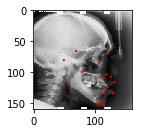

In [83]:
# okay, next:
# transform to square
# rotate each 3x
# flip each 1x 
# total: get 400*5-> 2000 pics or so
# save as downsized img

BASE_PATH = "/Users/franzr/Desktop/main_code/DENT_NEW/data/data_profile/profile/wang_cephalometrics/RawImage"
BASE_LABELS = "/Users/franzr/Desktop/main_code/DENT_NEW/data/data_profile/profile/wang_cephalometrics/AnnotationsByMD/400_senior"

def img_path_walker(base_path):
    # walk through subdirs to get all image paths
    img_paths = []
    for root, _, files in os.walk(base_path):
        for name in files:
            if name.endswith(".bmp"):
                img_paths.append(os.path.abspath(os.path.join(root, name)))
    return img_paths
    
def label_walker(base_labels):
    img_labels = {}
    for label_file in os.listdir(base_labels):
        linked_img = label_file[:-3] + "bmp"
        img_labels[linked_img] = extract_labels_from_txt(base_labels + "/" + label_file)
    return img_labels

# -1. load labels & transform into keypoint structure
# -2. for aug in augs: 
# --a. augment image & keypoint
# --b. save aug_img & aug_keypoint as 'img + aug_name' & 'kp + aug_name' 
img_labels = label_walker(BASE_LABELS)
img_paths = img_path_walker(BASE_PATH)

shrink = iaa.Scale({"height":160, "width":160})
augment_functions = [iaa.Fliplr(1.0), iaa.Flipud(1.0)]
augment_functions += [iaa.Affine(rotate=rot_angle) for rot_angle in [90, 180, 270]]

def aug_and_save(img, img_name, label, aug_list, base_path):
    kp = [list_to_kp(coords_raw)]
    img = shrink.augment_image(img)
    kp = shrink.augment_keypoints(kp)
    img_save_name = "aug_img/" + img_name + "_aug{}".format(0)
    io.imsave(img_save_name + ".png", img)
    with open(img_save_name + ".txt", "w") as lf:
            stringified = [str(tup) for tup in kp_to_list(kp[0].keypoints)]
            stringified = [s.replace("(", "").replace(")","") for s in stringified]
            lf.write("\n".join(stringified))
    for i, aug in enumerate(aug_list):
        img_aug = aug.augment_image(img)
        kp_aug = aug.augment_keypoints(kp)
        # save img:
        img_save_name = "aug_img/" + img_name + "_aug{}".format(i+1)
        io.imsave(img_save_name + ".png", img_aug)
        # save labelfile:
        with open(img_save_name + ".txt", "w") as lf:
            stringified = [str(tup) for tup in kp_to_list(kp_aug[0].keypoints)]
            stringified = [s.replace("(", "").replace(")","") for s in stringified]
            lf.write("\n".join(stringified))


for i, path in enumerate(img_paths):
    print path
    loop_img = img_as_ubyte(io.imread(path, as_grey=True))
    loop_labels = img_labels[path.split("/")[-1]]
    aug_and_save(loop_img, path.split("/")[-1][:-4], loop_labels, augment_functions, "aug_img")

test = img_as_ubyte(io.imread("/Users/franzr/Desktop/Dent_PJ_Stuff/dl_progression/aug_img/001_aug0.png", as_grey=True))
cr = extract_labels_from_txt("/Users/franzr/Desktop/Dent_PJ_Stuff/dl_progression/aug_img/001_aug0.txt")

fig = plt.figure()
ax = fig.add_subplot(2, 2, 1)
ax.imshow(test, cmap="gray")
for c in cr:
    ax.add_patch(plt.Circle(c, 1, color='r'))
plt.show()
